In [1]:
from math import log, ceil
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams ['font.family'] = 'serif'
rcParams ['font.size'] = 16

In [2]:
m_s=50.0
g=9.81
rou=1.091
r=0.5
A=numpy.pi*r**2
v_e=325.0
C_D=0.15
m_p0=100

In [3]:
T=40
dt=0.1
N=int(T/dt)+1
t=numpy.linspace(0,T,N)

In [4]:
m_p_rate=numpy.zeros(N)
for i in range(int(5/dt)):
    m_p_rate[i]=20

In [5]:
m_p=numpy.zeros(N)
mp0mmp=numpy.zeros(N)
for n in range(N-1):
    mp0mmp[n+1]=mp0mmp[n]+dt*m_p_rate[n]
    m_p[n]=m_p0-mp0mmp[n]

mp0mmp = $m_{p0}$-$m_p$

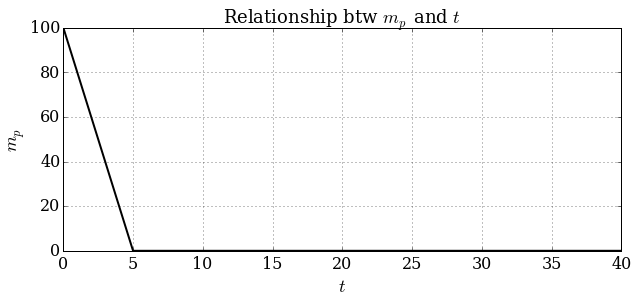

In [6]:
pyplot.figure(figsize=(10,4))
pyplot.grid(True)
pyplot.xlabel('$t$',fontsize=18)
pyplot.ylabel('$m_p$',fontsize=18)
pyplot.ylim(0,100)
pyplot.title('Relationship btw $m_p$ and $t$',fontsize=18)
pyplot.plot(t,m_p,'k-',lw=2)

In [7]:
print('When t = 3.2 s, the mass of remaining propellant in the rocket is {} kg.'.format(m_p[int(3.2/dt)]))

When t = 3.2 s, the mass of remaining propellant in the rocket is 36.0 kg.


In [8]:
h0=0.0
v0=0.0

In [9]:
def f(u):
    h=u[0]
    v=u[1]
    return numpy.array([v,-g+m_rate*v_e/m_total-0.5*rou*v*numpy.abs(v)*A*C_D/m_total])

In [10]:
def euler_step(u,f,dt):
    return u+dt*f(u)

In [11]:
u=numpy.empty((N,2))
m=numpy.empty_like(m_p,dtype=numpy.ndarray)
for n in range(N):
    m[n]=m_s+m_p[n]

In [12]:
for n in range(N-1):
    m_total=m[n]
    m_rate=m_p_rate[n]
    u[n+1]=euler_step(u[n],f,dt)

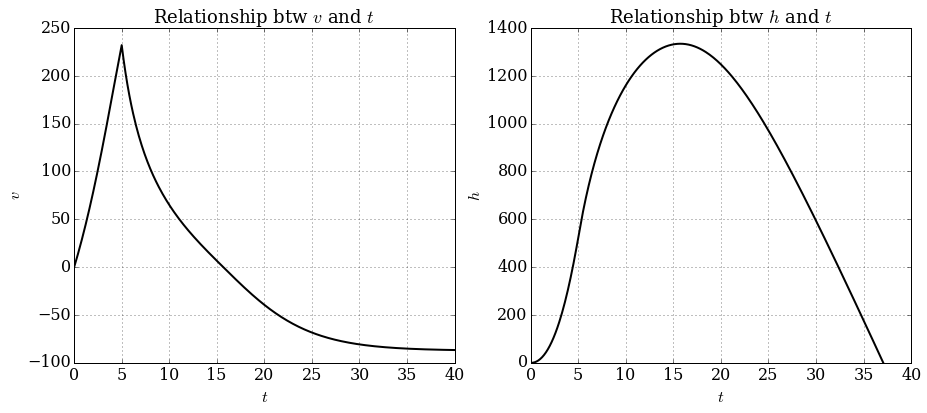

In [13]:
pyplot.figure(figsize=(15,6))
pyplot.subplot(121)
pyplot.grid(True)
pyplot.xlabel('$t$')
pyplot.ylabel('$v$')
pyplot.plot(t,u[:,1],'k-',lw=2)
pyplot.title('Relationship btw $v$ and $t$',fontsize=18)

pyplot.subplot(122)
pyplot.grid(True)
pyplot.xlabel('$t$')
pyplot.ylabel('$h$')
pyplot.ylim(0,1400)
pyplot.plot(t,u[:,0],'k-',lw=2)
pyplot.title('Relationship btw $h$ and $t$',fontsize=18)

In [14]:
print('maximum speed : v = {:.2f} m/s'.format(u[int(5/dt),1]),'occurs at t = 5 s',',and its altitude is h = {:.2f} m.'.format(u[int(5/dt),0]))

maximum speed : v = 232.11 m/s occurs at t = 5 s ,and its altitude is h = 523.52 m.


In [15]:
for n in range(N):
    if u[n,1]<=0:
        print('The maximum altitude : h = {:.2f} m'.format(u[n,0]),'occurs at t = {:.2f} s.'.format(n*dt))
        break

The maximum altitude : h = 1334.18 m occurs at t = 15.70 s.


In [16]:
for n in range(N):
    if u[n,0]<=0:
        print('At t = {:.2f} s'.format(n*dt),'the rocket impacts the ground, and its velocity is v = {:.2f} m/s.'.format(u[n,1]))
        break

At t = 37.10 s the rocket impacts the ground, and its velocity is v = -86.01 m/s.
